In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
# Import the Qiskit Jupyter tools 
from qiskit.tools import jupyter

In [3]:
# Initialize the job tracker to automatically track all jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [4]:
# Let's run a simple circuit on the least busy quantum device 
# and check the job watcher widget.
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda 
x: x.configuration().n_qubits >= (2) and                                   
not x.configuration().simulator and
x.status().operational==True))

#Create a simple circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
#Execute the circuit on the backend
job = execute(qc, backend)

In [5]:
#Disable the job watcher
%qiskit_disable_job_watcher

In [6]:
#Display the list of all available backends and provide 
#a brief overview of each 
%qiskit_backend_overview

In [7]:
# Import the transpiler passes object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))


['ALAPSchedule', 'ASAPSchedule', 'AlignMeasures', 'ApplyLayout', 'BIPMapping', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CXCancellation', 'CXDirection', 'CheckCXDirection', 'CheckGateDirection', 'CheckMap', 'Collect1qRuns', 'Collect2qBlocks', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'ConsolidateBlocks', 'ContainsInstruction', 'CountOps', 'CountOpsLongestPath', 'CrosstalkAdaptiveSchedule', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'DynamicalDecoupling', 'EchoRZXWeylDecomposition', 'EnlargeWithAncilla', 'Error', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HoareOptimizer', 'InverseCancellation', 'Layout2qDistance', 'LayoutTransformation', 'LookaheadSwap', 'MergeAdjacentBarriers', 'NoiseAdaptiveLayout', 'NumTensorFactors', 'Optimize1qGates', 'Optimize1qGatesDecomposition', 'Optimize1qGatesSimpleCommutation', 'OptimizeSwapBeforeMeasure', 'PulseGates', 'RZXCalibrat

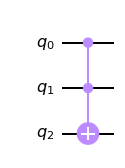

In [8]:
#Basic Toffoli gate,
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()


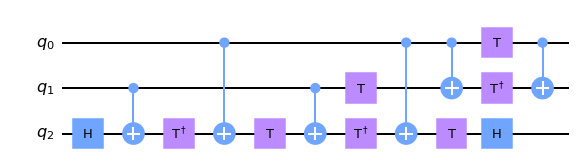

In [9]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()


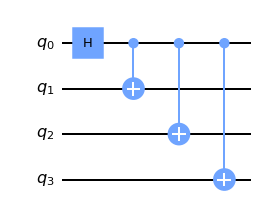

In [10]:
#Basic circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


In [11]:
#Print the depth of both inital and decomposed circuit
print('Initial circuit depth: ', qc.depth())
print('Decomposed circuit depth: ', qc_decomposed.depth())
#Get the number of operators in initial circuit
print('Initial circuit operation count: ', qc.count_ops())
#Get the number of operators in decomposed circuit
print('Decomposed circuit operation count: ', qc_decomposed.count_ops())


Initial circuit depth:  4
Decomposed circuit depth:  11
Initial circuit operation count:  OrderedDict([('cx', 3), ('h', 1)])
Decomposed circuit operation count:  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


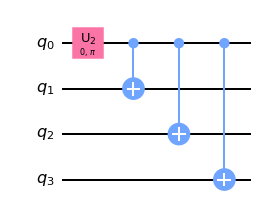

In [12]:
qc_decomposed = qc.decompose()
qc_decomposed.draw()

In [13]:
# Get the backend device: ibmq_santiago 
backend_santiago = provider.get_backend('ibmq_santiago')
# Launch backend viewer of ibmq_santiago
backend_santiago


<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
# Get the backend device: ibmq_16_lima
backend_lima = provider.get_backend('ibmq_lima')
# Launch backend viewer of ibmq_lima
backend_lima


<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

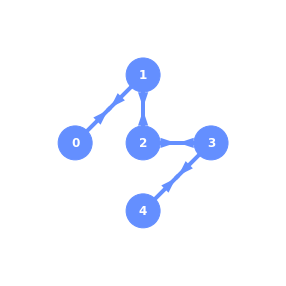

In [15]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_santiago, plot_directed=True)


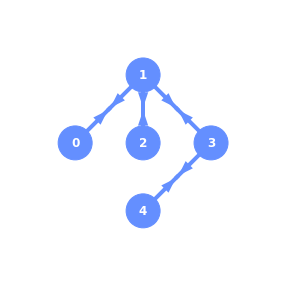

In [16]:
# Visualize the coupling directional map between the qubits 
plot_gate_map(backend_lima, plot_directed=True)


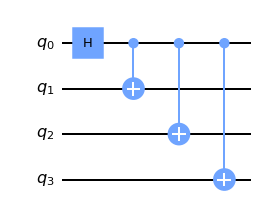

In [17]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()


Depth: 12


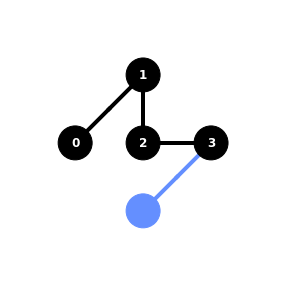

In [18]:
# Transpile the circuit with an optimization level = 0
qc_santiago_0 = transpile(qc, backend_santiago, seed_transpiler=10258, optimization_level=0)
# Print out the depth of the circuit
print('Depth:', qc_santiago_0.depth())
# Plot the resulting layout of the quantum circuit after Layout
plot_circuit_layout(qc_santiago_0, backend_santiago)


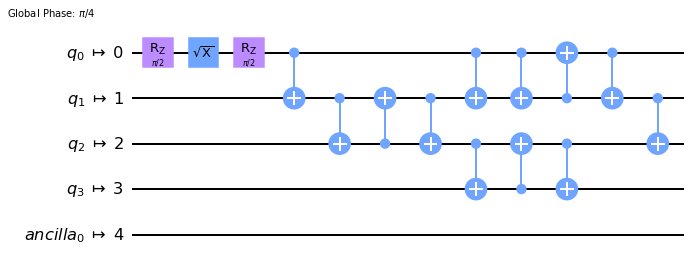

In [19]:
qc_santiago_0.draw()

Depth: 12


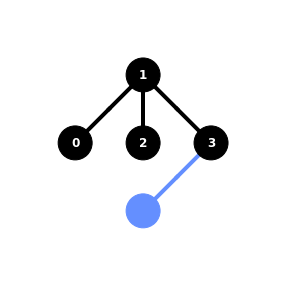

In [20]:
# View the transpiled circuit with an optimization level = 0
qc_lima_0 = transpile(qc, backend_lima, seed_transpiler=10258, optimization_level=0)
print('Depth:', qc_lima_0.depth())
plot_circuit_layout(qc_lima_0, backend_lima)


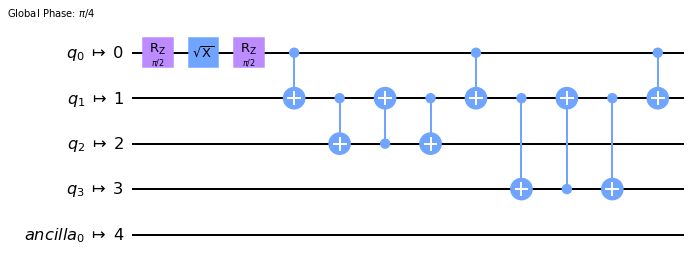

In [21]:
qc_lima_0.draw()

Depth: 7
Ops count:  OrderedDict([('cx', 4), ('rz', 2), ('sx', 1)])


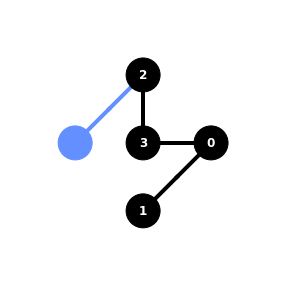

In [22]:
# Transpile the quantum circuit with the optimization level = 3
qc_transpiled_santiago = transpile(qc, backend_santiago, optimization_level=3)
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_santiago.depth())
print('Ops count: ', qc_transpiled_santiago.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_santiago, backend_santiago)


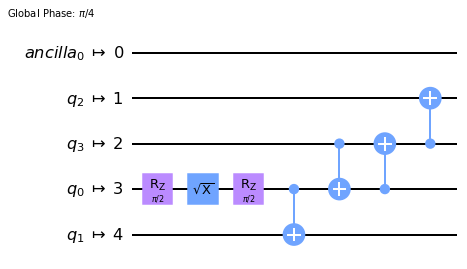

In [23]:
# Redraw the transpiled circuit at new level
qc_transpiled_santiago.draw()


Depth: 6
Ops count:  OrderedDict([('cx', 3), ('rz', 2), ('sx', 1)])


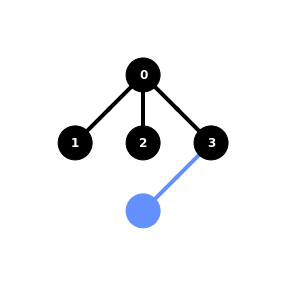

In [24]:
# Transpile the quantum circuit with the optimization level = 3
qc_transpiled_lima = transpile(qc, backend_lima, optimization_level=3)
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_lima.depth())
print('Ops count: ', qc_transpiled_lima.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_lima, backend_lima)


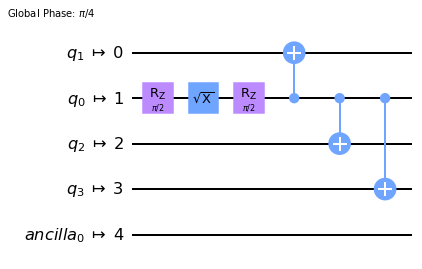

In [25]:
qc_transpiled_lima.draw()

In [26]:
# View the ibmqx2 backend device configuraiton and properties
backend = provider.get_backend('ibmq_lima')
backend


<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
# View the backend coupling map, displayed as CNOTs (Control-Target)
backend = provider.get_backend('ibmq_lima')
# Extract the coupling map from the backend
ibmq_lima_coupling_map = backend.configuration().coupling_map
# List out the extracted coupling map
ibmq_lima_coupling_map


[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

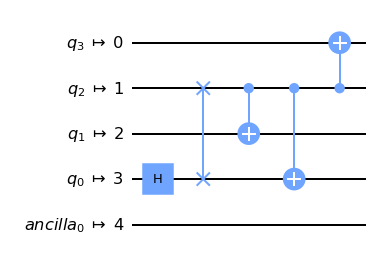

In [28]:
# Transpile the a custom circuit using only the coupling map. 
# Set the backend to None so it will force using the coupling map provided.
qc_custom = transpile(qc, backend=None, coupling_map=ibmq_lima_coupling_map)
# Draw the resulting custom topology circuit.
qc_custom.draw()


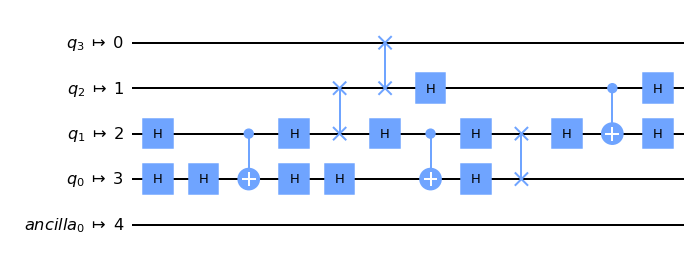

In [29]:
# Create our own coupling map (custom topology)
custom_linear_topology = [[0,1],[1,2],[2,3],[3,4]]
# Set the coupling map to our custom linear topology
qc_custom = transpile(qc, backend=None, coupling_map=custom_linear_topology)
# Draw the resulting circuit.
qc_custom.draw()


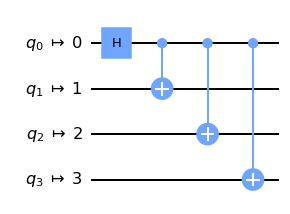

In [30]:
# Import the PassManager and a few Passes
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap
pm = PassManager()

# Create a TrivialLayout based on the ibmq_lima coupling map
trivial = TrivialLayout(CouplingMap(ibmq_lima_coupling_map))
# Append the TrivialLayout to the PassManager
pm.append(trivial)
# Run the PassManager and draw the resulting circuit
tv_qc = pm.run(qc)
tv_qc.draw()


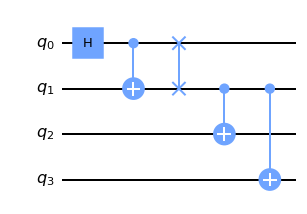

In [31]:
# Create a BasicSwap based on the ibmq_lima coupling map we used earlier
basic_swap = BasicSwap(CouplingMap(ibmq_lima_coupling_map))
#Add the BasicSwap to the PassManager
pm = PassManager(basic_swap)
# Run the PassManager and draw the results
new_qc = pm.run(qc)
new_qc.draw()


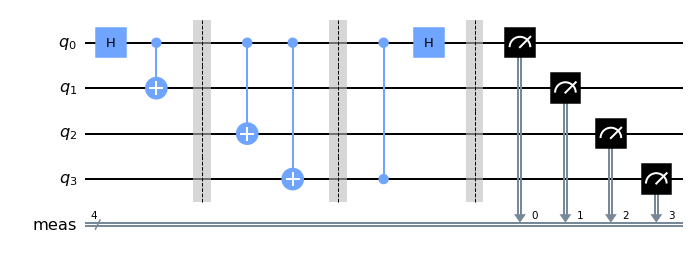

In [32]:
# Sample quantum circuit 
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.cz(3,0)
qc.h(0)
qc.measure_all()
# Draw the circuit using the default renderer
qc.draw()


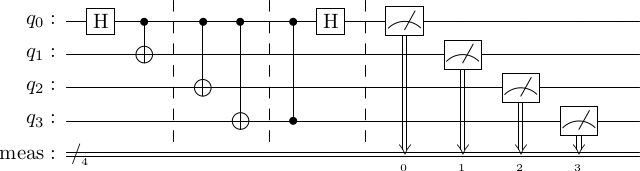

In [33]:
qc.draw('latex')

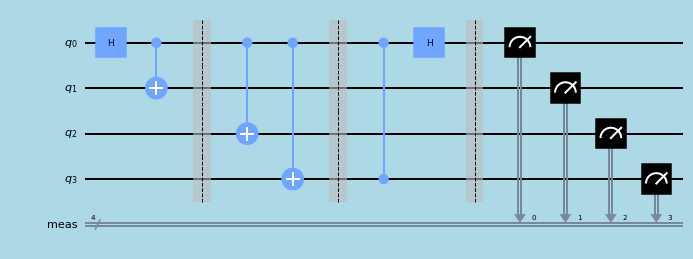

In [34]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue','gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9}
# Draw the mpl with the specified style
qc.draw(style=style)


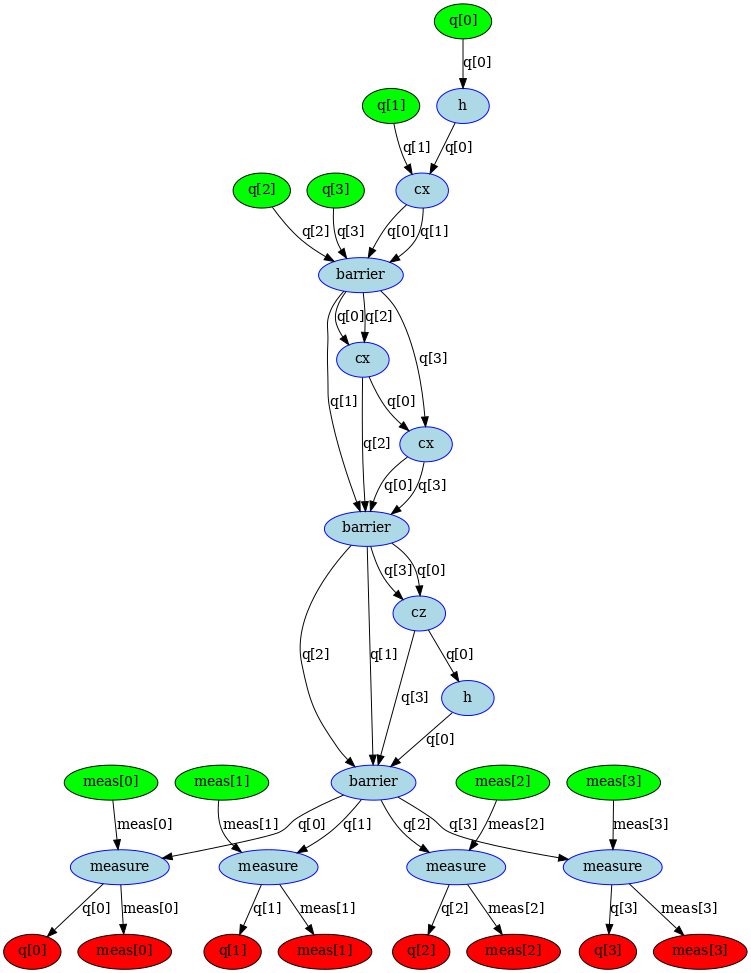

In [35]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.tools.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)
# Draw the DAG of the circuit
dag_drawer(dag)


In [36]:
import qiskit.tools.jupyter
%qiskit_version_table